# Analyzing my NETFLIX personal data

Even though I'm not a very active netflix viewer nowadays, I saw some shows back in the days.

This notebook will have the overview of the data and also an analysis of my favorite show.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Import the data

In [37]:
df= pd.read_csv('ViewingActivity.csv')

# Data PreProcessing


In [38]:
df.shape

(1994, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             1994 non-null   object
 1   Start Time               1994 non-null   object
 2   Duration                 1994 non-null   object
 3   Attributes               737 non-null    object
 4   Title                    1994 non-null   object
 5   Supplemental Video Type  122 non-null    object
 6   Device Type              1994 non-null   object
 7   Bookmark                 1994 non-null   object
 8   Latest Bookmark          1994 non-null   object
 9   Country                  1994 non-null   object
dtypes: object(10)
memory usage: 155.9+ KB


In [40]:
# visualize initial information
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Lucas,2021-07-04 04:14:11,00:00:14,NaN,Elite: Temporada 4: A nova ordem (Episódio 1),NaN,Chrome PC (Cadmium),00:00:15,00:00:15,BR (Brazil)
1,Lucas,2021-07-03 16:52:54,00:00:01,Autoplayed: user action: User_Interaction;,Elite: Temporada 4: A nova ordem (Episódio 1),NaN,Chrome PC (Cadmium),00:00:01,Not latest view,BR (Brazil)
2,Lucas,2021-07-03 04:30:05,00:00:04,Autoplayed: user action: None;,Temporada 2 (Trailer): Mortel,TRAILER,Chrome PC (Cadmium),00:00:04,00:00:04,BR (Brazil)
3,Lucas,2021-07-01 19:15:32,00:00:01,Autoplayed: user action: None;,O Mito de Sísifo: Temporada 1: Episódio 1 (Epi...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:00:01,00:00:01,BR (Brazil)
4,Lucas,2021-06-27 04:00:28,00:02:28,NaN,The A List: Temporada 2: Quem nós realmente so...,NaN,Chrome PC (Cadmium),00:25:15,00:25:15,BR (Brazil)


In [41]:
#drop irrelevant columns for the analysis
df=df.drop(['Profile Name','Attributes','Supplemental Video Type','Bookmark','Latest Bookmark','Country'],axis=1)

In [42]:
df.head()

,Start Time,Duration,Title,Device Type
0,2021-07-04 04:14:11,00:00:14,Elite: Temporada 4: A nova ordem (Episódio 1),Chrome PC (Cadmium)
1,2021-07-03 16:52:54,00:00:01,Elite: Temporada 4: A nova ordem (Episódio 1),Chrome PC (Cadmium)
2,2021-07-03 04:30:05,00:00:04,Temporada 2 (Trailer): Mortel,Chrome PC (Cadmium)
3,2021-07-01 19:15:32,00:00:01,O Mito de Sísifo: Temporada 1: Episódio 1 (Epi...,Samsung 2017 Kant-M UHD TV Smart TV
4,2021-06-27 04:00:28,00:02:28,The A List: Temporada 2: Quem nós realmente so...,Chrome PC (Cadmium)


In [43]:
#Transform Start Time column to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

df = df.set_index('Start Time')

# convert from UTC timezone to  Argentina Timezone, that happens to be the same as in Brazil
df.index = df.index.tz_convert('America/Argentina/Catamarca')

df = df.reset_index()

In [44]:
df.head()

,Start Time,Duration,Title,Device Type
0,2021-07-04 01:14:11-03:00,00:00:14,Elite: Temporada 4: A nova ordem (Episódio 1),Chrome PC (Cadmium)
1,2021-07-03 13:52:54-03:00,00:00:01,Elite: Temporada 4: A nova ordem (Episódio 1),Chrome PC (Cadmium)
2,2021-07-03 01:30:05-03:00,00:00:04,Temporada 2 (Trailer): Mortel,Chrome PC (Cadmium)
3,2021-07-01 16:15:32-03:00,00:00:01,O Mito de Sísifo: Temporada 1: Episódio 1 (Epi...,Samsung 2017 Kant-M UHD TV Smart TV
4,2021-06-27 01:00:28-03:00,00:02:28,The A List: Temporada 2: Quem nós realmente so...,Chrome PC (Cadmium)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype                                      
---  ------       --------------  -----                                      
 0   Start Time   1994 non-null   datetime64[ns, America/Argentina/Catamarca]
 1   Duration     1994 non-null   object                                     
 2   Title        1994 non-null   object                                     
 3   Device Type  1994 non-null   object                                     
dtypes: datetime64[ns, America/Argentina/Catamarca](1), object(3)
memory usage: 62.4+ KB


In [46]:
#Transform Duration column to TimeDelta
df['Duration'] = pd.to_timedelta(df['Duration'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype                                      
---  ------       --------------  -----                                      
 0   Start Time   1994 non-null   datetime64[ns, America/Argentina/Catamarca]
 1   Duration     1994 non-null   timedelta64[ns]                            
 2   Title        1994 non-null   object                                     
 3   Device Type  1994 non-null   object                                     
dtypes: datetime64[ns, America/Argentina/Catamarca](1), object(2), timedelta64[ns](1)
memory usage: 62.4+ KB


In [48]:
# Drop rows that are under 1 minute duration
df = df[(df['Duration'] > '0 days 00:01:00')]

In [49]:
df.shape

(1387, 4)

A lot of information was dropped from the dataset, possibly trailers and shows that I opened but not watched(I do that a lot of times)

In [50]:
#Split The Title Column into 3 separate columns(Name,Season,Episode)
df[['Name','Season','Episode']]=df['Title'].str.split('(Temporada \w:)',expand=True)

In [51]:
df.head()

,Start Time,Duration,Title,Device Type,Name,Season,Episode
4,2021-06-27 01:00:28-03:00,0 days 00:02:28,The A List: Temporada 2: Quem nós realmente so...,Chrome PC (Cadmium),The A List:,Temporada 2:,Quem nós realmente somos (Episódio 8)
5,2021-06-27 00:56:21-03:00,0 days 00:03:50,The A List: Temporada 2: Salvá-los (Episódio 7),Chrome PC (Cadmium),The A List:,Temporada 2:,Salvá-los (Episódio 7)
6,2021-06-27 00:52:36-03:00,0 days 00:03:25,The A List: Temporada 2: Devido a quem eu sou ...,Chrome PC (Cadmium),The A List:,Temporada 2:,Devido a quem eu sou (Episódio 6)
7,2021-06-27 00:50:28-03:00,0 days 00:01:54,The A List: Temporada 2: Merecemos um ao outro...,Chrome PC (Cadmium),The A List:,Temporada 2:,Merecemos um ao outro (Episódio 5)
8,2021-06-27 00:45:15-03:00,0 days 00:04:53,The A List: Temporada 2: Nunca fomos amigas (E...,Chrome PC (Cadmium),The A List:,Temporada 2:,Nunca fomos amigas (Episódio 4)


We can see that the last show that I watched was 'The A List' Season 2

# Analyzing the Data

Lets see an analysis of one of my favorite shows as a Sports Fan: 'F1: Drive to Survive'

In [52]:
#Filter the dataset using str.contains
f1 = df[df['Title'].str.contains('F1: Dirigir', regex=False)]

In [53]:
#It was successful as we can see
f1.head()

,Start Time,Duration,Title,Device Type,Name,Season,Episode
241,2021-04-02 05:50:23-03:00,0 days 00:16:40,F1: Dirigir para Viver: Temporada 3: A batalha...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,A batalha chega ao fim (Episódio 10)
242,2021-04-02 05:12:04-03:00,0 days 00:36:32,F1: Dirigir para Viver: Temporada 3: Um grave ...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,Um grave acidente (Episódio 9)
243,2021-04-02 04:49:07-03:00,0 days 00:22:40,F1: Dirigir para Viver: Temporada 3: Sem arrep...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,Sem arrependimentos (Episódio 8)
244,2021-04-02 04:20:36-03:00,0 days 00:28:12,F1: Dirigir para Viver: Temporada 3: A difícil...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,A difícil escolha de Guenther Steiner (Episód...
246,2021-04-01 05:50:26-03:00,0 days 00:19:13,F1: Dirigir para Viver: Temporada 3: O retorno...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,O retorno (Episódio 6)


The show's episodes tend to have approximately 40 minutes, and we can see that the duration column doesn't correspond with that information.

This has to be with my habit to 'jump' some parts of the episode that I think are irrelevant or parts that I already know what happened, not just with that show but for most shows I watch.


In [54]:
f1.shape

(35, 7)

The show has 10 episodes per season, and the dataset has 35 rows, which probably means that i watched all episodes and split some episodes in parts.
What is accurate as I don't have the habit of rewatch shows

# When do I watch F1:Drive to survive

In [55]:
#Let do some tranformation first 
# We have to just use the dt.weekday and dt.hour here, because we already change the column to datetime type
f1['weekday'] = f1['Start Time'].dt.weekday
f1['hour'] = f1['Start Time'].dt.hour

In [56]:
f1.head()

,Start Time,Duration,Title,Device Type,Name,Season,Episode,weekday,hour
241,2021-04-02 05:50:23-03:00,0 days 00:16:40,F1: Dirigir para Viver: Temporada 3: A batalha...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,A batalha chega ao fim (Episódio 10),4,5
242,2021-04-02 05:12:04-03:00,0 days 00:36:32,F1: Dirigir para Viver: Temporada 3: Um grave ...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,Um grave acidente (Episódio 9),4,5
243,2021-04-02 04:49:07-03:00,0 days 00:22:40,F1: Dirigir para Viver: Temporada 3: Sem arrep...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,Sem arrependimentos (Episódio 8),4,4
244,2021-04-02 04:20:36-03:00,0 days 00:28:12,F1: Dirigir para Viver: Temporada 3: A difícil...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,A difícil escolha de Guenther Steiner (Episód...,4,4
246,2021-04-01 05:50:26-03:00,0 days 00:19:13,F1: Dirigir para Viver: Temporada 3: O retorno...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,O retorno (Episódio 6),3,5


In [57]:
f1['weekday'] = pd.Categorical(f1['weekday'], categories=
    [0,1,2,3,4,5,6],ordered=True)
f1.head()

,Start Time,Duration,Title,Device Type,Name,Season,Episode,weekday,hour
241,2021-04-02 05:50:23-03:00,0 days 00:16:40,F1: Dirigir para Viver: Temporada 3: A batalha...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,A batalha chega ao fim (Episódio 10),4,5
242,2021-04-02 05:12:04-03:00,0 days 00:36:32,F1: Dirigir para Viver: Temporada 3: Um grave ...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,Um grave acidente (Episódio 9),4,5
243,2021-04-02 04:49:07-03:00,0 days 00:22:40,F1: Dirigir para Viver: Temporada 3: Sem arrep...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,Sem arrependimentos (Episódio 8),4,4
244,2021-04-02 04:20:36-03:00,0 days 00:28:12,F1: Dirigir para Viver: Temporada 3: A difícil...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,A difícil escolha de Guenther Steiner (Episód...,4,4
246,2021-04-01 05:50:26-03:00,0 days 00:19:13,F1: Dirigir para Viver: Temporada 3: O retorno...,Chrome PC (Cadmium),F1: Dirigir para Viver:,Temporada 3:,O retorno (Episódio 6),3,5


[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thus'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

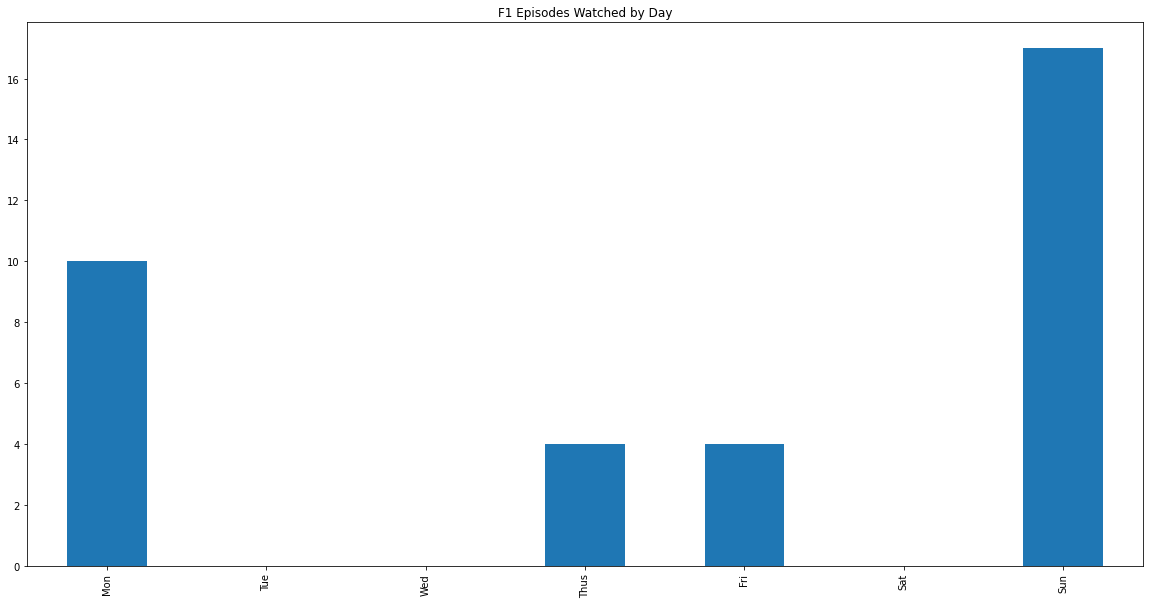

In [58]:
f1_day = f1['weekday'].value_counts()

# sort the index 
f1_day = f1_day.sort_index()

#set the labels
labels = ['Mon', 'Tue', 'Wed','Thus','Fri','Sat','Sun']

#plot the data
ax=f1_day.plot(kind='bar', figsize=(20,10), title='F1 Episodes Watched by Day')
ax.set_xticklabels(labels)


So this graph was a shock for me!!

The fact that i watch the most on Sunday was a fact that i already suspected,because that's generally the day i like to watch shows, but the fact that i never watched this show on Saturday was so unbeliavable that I'm questioning myself if this is true.

I guess that has to be with the fact that i like to marathon shows,instead of watching splitted.


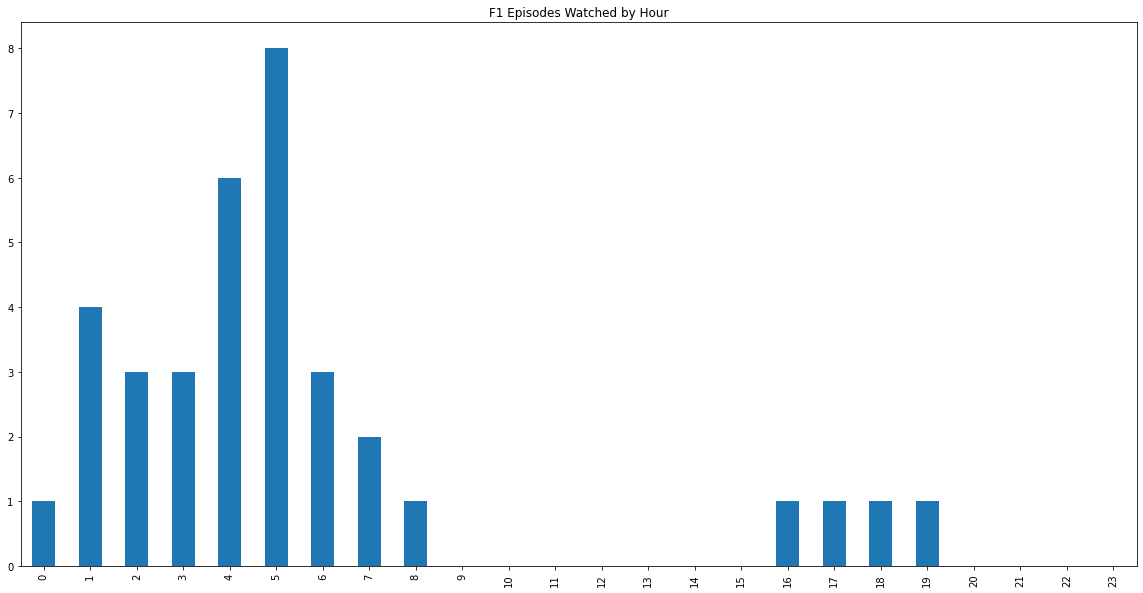

In [59]:
f1['hour'] = pd.Categorical(f1['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)


f1_hour = f1['hour'].value_counts()

#sort index by hour
f1_hour = f1_hour.sort_index()

# plot the data
ax=f1_hour.plot(kind='bar', figsize=(20,10), title='F1 Episodes Watched by Hour')

As we can see the graph shows that i saw most shows at night and at dawn, which is true because I enjoyed to marathon shows at that period of time in my vacations.And this show is probably one of them!

# Future Work

In [60]:
df.groupby('Name')['Duration'].sum().sort_values(ascending=False)

Name
Sex Education:                                                                 0 days 17:42:34
F1: Dirigir para Viver:                                                        0 days 12:15:58
O Mecanismo:                                                                   0 days 11:32:22
Shadowhunters: The Mortal Instruments:                                         0 days 10:46:31
Jurassic World: Acampamento Jurássico:                                         0 days 07:14:14
                                                                                     ...      
Kakegurui: Kakegurui xx: A garota traidora (Episódio 7)                        0 days 00:01:07
Os cavaleiros do zodíaco Hades: Santuário: Momento de Hesitacao (Episódio 8)   0 days 00:01:06
La casa de papel: Parte 4: Cinco minutos antes (Episódio 5)                    0 days 00:01:04
A Desordem que Ficou: Minissérie: O caos que vocês criaram (Episódio 8)        0 days 00:01:04
Sex/Life:                                    